In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# **Introduction**

This Jupyter Notebook documents the data cleaning and preparation process for a railway dataset (railway.csv), which contains detailed information about train ticket transactions, journey details, and operational performance. The dataset includes attributes such as transaction IDs, purchase details, ticket types, journey times, and delay information, covering 31,653 records of train journeys in the UK.

The primary objective of this project is to assess and clean the dataset to ensure its quality and usability for subsequent analysis, such as evaluating railway performance, pricing trends, or customer satisfaction. The notebook follows a structured approach:

**Data Gathering**: Loading the raw dataset using pandas.

**Data Assessing**: Identifying quality issues, including missing values, inconsistent formats, and incorrect data types.

**Data Cleaning**: Addressing identified issues by standardizing column names, handling missing values, converting data types, and creating new features like journey duration.

**Data Storing**: Saving the cleaned dataset for future analysis.
The cleaning process adheres to data quality principles (completeness, validity, consistency) to produce a reliable dataset (Railway_clean.csv). Libraries such as pandas, NumPy, seaborn, and matplotlib are used for data manipulation and visualization, with warnings suppressed for clarity. This notebook serves as a foundation for further exploratory data analysis or modeling to derive actionable insights from the railway data.


# **About the Data**

The railway dataset (`railway.csv`) contains 31,653 records of train ticket transactions in the UK, capturing details about ticket purchases, journey specifics, and operational outcomes. Each record represents a unique ticket purchase and includes information such as the purchase method, ticket type, journey times, and any delays or refund requests. The dataset is designed to support analyses of railway performance, pricing strategies, and customer satisfaction.

The table below describes the dataset’s fields, as provided in the data dictionary:

| Field                | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| Transaction ID        | Unique identifier for an individual train ticket purchase                    |
| Date of Purchase     | Date the ticket was purchased                                               |
| Time of Purchase     | Time the ticket was purchased                                               |
| Purchase Type        | Whether the ticket was purchased online or directly at a train station       |
| Payment Method       | Payment method used to purchase the ticket (Contactless, Credit Card, or Debit Card) |
| Railcard             | Whether the passenger is a National Railcard holder (Adult, Senior, or Disabled) or not (None). Railcard holders get 1/3 off their ticket purchases. |
| Ticket Class         | Seat class for the ticket (Standard or First)                                |
| Ticket Type          | When you bought or can use the ticket. Advance tickets are 1/2 off and must be purchased at least a day prior to departure. Off-Peak tickets are 1/4 off and must be used outside of peak hours (weekdays between 6-8am and 4-6pm). Anytime tickets are full price and can be bought and used at any time during the day. |
| Price                | Final cost of the ticket                                                    |
| Departure Station    | Station to board the train                                                  |
| Arrival Destination  | Station to exit the train                                                   |
| Date of Journey      | Date the train departed                                                     |
| Departure Time       | Time the train departed                                                     |
| Arrival Time         | Time the train was scheduled to arrive at its destination (can be on the day after departure) |
| Actual Arrival Time  | Time the train arrived at its destination (can be on the day after departure) |
| Journey Status       | Whether the train was on time, delayed, or cancelled                         |
| Reason for Delay     | Reason for the delay or cancellation                                        |
| Refund Request       | Whether the passenger requested a refund after a delay or cancellation       |

This dataset provides a comprehensive view of railway operations, enabling insights into ticket pricing, journey reliability, and customer behavior. The subsequent sections of this notebook focus on cleaning and preparing the data to address quality issues, such as missing values, inconsistent formats, and incorrect data types, to ensure it is ready for analysis.

#  **Gather the data**

In [2]:
df= pd.read_csv('/content/railway.csv')
df

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,NaN,No
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,NaN,No
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,NaN,No
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,NaN,No


# **Data Assessing**

1- Quality issues




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [4]:
# prompt: check values for catigorical columns except for Actual Arrival Time , Arrival Time, Departure Time, Date of Journey, Time of Purchase, Date of Purchase, Transaction ID

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns_to_check = [col for col in categorical_columns if col not in ['Actual Arrival Time', 'Arrival Time', 'Departure Time', 'Date of Journey', 'Time of Purchase', 'Date of Purchase', 'Transaction ID']]

for column in categorical_columns_to_check:
    print(f"Values for {column}:")
    print(df[column].unique())
    print("-" * 20)


Values for Purchase Type:
['Online' 'Station']
--------------------
Values for Payment Method:
['Contactless' 'Credit Card' 'Debit Card']
--------------------
Values for Railcard:
['Adult' nan 'Disabled' 'Senior']
--------------------
Values for Ticket Class:
['Standard' 'First Class']
--------------------
Values for Ticket Type:
['Advance' 'Off-Peak' 'Anytime']
--------------------
Values for Departure Station:
['London Paddington' 'London Kings Cross' 'Liverpool Lime Street'
 'London Euston' 'York' 'Manchester Piccadilly' 'Birmingham New Street'
 'London St Pancras' 'Oxford' 'Reading' 'Edinburgh Waverley'
 'Bristol Temple Meads']
--------------------
Values for Arrival Destination:
['Liverpool Lime Street' 'York' 'Manchester Piccadilly' 'Reading'
 'London Euston' 'Oxford' 'Durham' 'London St Pancras'
 'Birmingham New Street' 'London Paddington' 'Bristol Temple Meads'
 'Tamworth' 'London Waterloo' 'Sheffield' 'Wolverhampton' 'Leeds'
 'Stafford' 'Doncaster' 'Swindon' 'Nottingham' 'Pete

- change the name of the columns to be easier to deal with.
- Completeness

  1- null values in 'Railcard

  2- create 'journey_duration' and 'Actual_journey_duration'and 'Delay_time'

  3- null values in 'Reason_For_Delay'

- Validity
  
  1- 'Date_Of_Purchase' and 'Time_Of_Purchase' should be combined in one column of the type datetime

  2- Convert 'Date_Of_Journey' to datetime

  3-Change the type of 'Departure_Time', 'Arrival_Time' and 'Actual_Arrival_Time' to datetime

- Consistency

   make sure all values are uniform, standardize categorical columns.


# **Data Cleaning**
Fixing Quality issues

In [5]:
df_clean= df.copy()
df_clean

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,NaN,No
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,NaN,No
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,NaN,No
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,NaN,No


A- Define

Change the names of the columns

B- Code

In [6]:
df_clean.rename(columns={'Transaction ID':'Transaction_ID',
                         'Date of Purchase':'Date_of_Purchase',
                         'Time of Purchase':'Time_of_Purchase',
                         'Purchase Type':'Purchase_Type',
                         'Payment Method':'Payment_Method',
                         'Ticket Class':'Ticket_Class',
                         'Ticket Type':'Ticket_Type',
                         'Departure Station':'Departure_Station',
                         'Arrival Destination':'Arrival_Destination',
                         'Date of Journey':'Date_of_Journey',
                         'Departure Time':'Departure_Time',
                         'Arrival Time':'Arrival_Time',
                         'Actual Arrival Time':'Actual_Arrival_Time',
                         'Journey Status':'Journey_Status',
                         'Reason for Delay':'Reason_for_Delay',
                         'Refund Request':'Refund_Request'},inplace=True)


C- Test

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction_ID       31653 non-null  object
 1   Date_of_Purchase     31653 non-null  object
 2   Time_of_Purchase     31653 non-null  object
 3   Purchase_Type        31653 non-null  object
 4   Payment_Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket_Class         31653 non-null  object
 7   Ticket_Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure_Station    31653 non-null  object
 10  Arrival_Destination  31653 non-null  object
 11  Date_of_Journey      31653 non-null  object
 12  Departure_Time       31653 non-null  object
 13  Arrival_Time         31653 non-null  object
 14  Actual_Arrival_Time  29773 non-null  object
 15  Journey_Status       31653 non-null  object
 16  Reas

A- Define

Replace null values in 'Railcard' with none

B- Code

In [8]:
df_clean['Railcard'].fillna('None',inplace=True)

C- Test

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction_ID       31653 non-null  object
 1   Date_of_Purchase     31653 non-null  object
 2   Time_of_Purchase     31653 non-null  object
 3   Purchase_Type        31653 non-null  object
 4   Payment_Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket_Class         31653 non-null  object
 7   Ticket_Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure_Station    31653 non-null  object
 10  Arrival_Destination  31653 non-null  object
 11  Date_of_Journey      31653 non-null  object
 12  Departure_Time       31653 non-null  object
 13  Arrival_Time         31653 non-null  object
 14  Actual_Arrival_Time  29773 non-null  object
 15  Journey_Status       31653 non-null  object
 16  Reas

A- Define

Replace null values in 'Reason_for_Delay' with No Delay

B- Code

In [10]:
df_clean['Reason_for_Delay'].fillna('No Delay',inplace=True)

C- Test

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction_ID       31653 non-null  object
 1   Date_of_Purchase     31653 non-null  object
 2   Time_of_Purchase     31653 non-null  object
 3   Purchase_Type        31653 non-null  object
 4   Payment_Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket_Class         31653 non-null  object
 7   Ticket_Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure_Station    31653 non-null  object
 10  Arrival_Destination  31653 non-null  object
 11  Date_of_Journey      31653 non-null  object
 12  Departure_Time       31653 non-null  object
 13  Arrival_Time         31653 non-null  object
 14  Actual_Arrival_Time  29773 non-null  object
 15  Journey_Status       31653 non-null  object
 16  Reas

A- Define

'Date_Of_Purchase' and 'Time_Of_Purchase' change the type to datetime

B- Code

In [12]:
df_clean['Date_of_Purchase']= pd.to_datetime(df_clean['Date_of_Purchase'])
df_clean['Time_of_Purchase']= pd.to_datetime(df_clean['Time_of_Purchase'])

C- Test

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  datetime64[ns]
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  object        
 12  Departure_Time       31653 non-null  object        
 13  Arrival_Time         31653 non-

A- Define

merge  'Date_Of_Purchase' and 'Time_Of_Purchase'into 'Date_Time_Purchase'

B- Code

In [14]:
df_clean['Date_Time_Purchase'] = pd.to_datetime(df_clean['Date_of_Purchase'].dt.strftime('%Y-%m-%d') + ' ' + df_clean['Time_of_Purchase'].dt.strftime('%H:%M:%S'))

C- Test

In [15]:
df_clean

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request,Date_Time_Purchase
0,da8a6ba8-b3dc-4677-b176,2023-12-08,2025-05-09 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,No Delay,No,2023-12-08 12:41:11
1,b0cdd1b0-f214-4197-be53,2023-12-16,2025-05-09 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01
2,f3ba7a96-f713-40d9-9629,2023-12-19,2025-05-09 19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,No Delay,No,2023-12-19 19:51:27
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,2025-05-09 23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,No Delay,No,2023-12-20 23:00:36
4,2be00b45-0762-485e-a7a3,2023-12-27,2025-05-09 18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,No Delay,No,2023-12-27 18:22:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,2025-05-09 18:42:58,Online,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,No Delay,No,2024-04-30 18:42:58
31649,7da22246-f480-417c-bc2f,2024-04-30,2025-05-09 18:46:10,Online,Contactless,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,No Delay,No,2024-04-30 18:46:10
31650,add9debf-46c1-4c75-b52d,2024-04-30,2025-05-09 18:56:41,Station,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,No Delay,No,2024-04-30 18:56:41
31651,b92b047c-21fd-4859-966a,2024-04-30,2025-05-09 19:51:47,Station,Credit Card,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,No Delay,No,2024-04-30 19:51:47


A- Define

Change 'Date_of_Journey' to datetime

B- Code

In [16]:
df_clean['Date_of_Journey']= pd.to_datetime(df_clean['Date_of_Journey'])

C- Test

In [17]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  datetime64[ns]
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  object        
 13  Arrival_Time         31653 non-

A- Define

Change the type of 'Departure_Time' to datetime

Change the type of 'Arrival_Time' to datetime

Change the type of 'Actual_Arrival_Time' to datetime

and add the journey date to them insteed of a random date

B- code

In [18]:
def adjust_arrival_time(row):
    row['Arrival_Time'] = pd.to_datetime(row['Arrival_Time'])
    row['Departure_Time'] = pd.to_datetime(row['Departure_Time'])
    row['Actual_Arrival_Time'] = pd.to_datetime(row['Actual_Arrival_Time'])

    # Check if Actual_Arrival_Time is valid before accessing .time()
    if pd.notna(row['Actual_Arrival_Time']) and row['Arrival_Time'].time() < row['Departure_Time'].time():
        row['Arrival_Time'] = row['Arrival_Time'] + pd.DateOffset(days=1)
    # Check if Actual_Arrival_Time is valid before accessing .time()
    if pd.notna(row['Actual_Arrival_Time']) and row['Actual_Arrival_Time'].time() < row['Departure_Time'].time():
        row['Actual_Arrival_Time'] = row['Actual_Arrival_Time'] + pd.DateOffset(days=1)
    return row

df_clean["Departure_Time"] = pd.to_datetime(df_clean["Departure_Time"])
df_clean["Arrival_Time"] = pd.to_datetime(df_clean["Arrival_Time"])
df_clean["Actual_Arrival_Time"] = pd.to_datetime(df_clean["Actual_Arrival_Time"])

df_clean["Departure_Time"] = pd.to_datetime(df_clean['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df_clean["Departure_Time"].dt.strftime('%H:%M:%S'))
df_clean["Arrival_Time"] = pd.to_datetime(df_clean['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df_clean["Arrival_Time"].dt.strftime('%H:%M:%S'))
df_clean["Actual_Arrival_Time"] = pd.to_datetime(df_clean['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df_clean["Actual_Arrival_Time"].dt.strftime('%H:%M:%S'))

df_clean = df_clean.apply(adjust_arrival_time, axis=1)

C- test

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  datetime64[ns]
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  datetime64[ns]
 13  Arrival_Time         31653 non-

A- Define

make sure all values are uniform, standardize categorical columns.

B- Code

In [20]:
text_columns = ["Purchase Type", "Payment Method", "Railcard", "Ticket Class", "Ticket Type", "Journey Status"]
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip().str.lower())


C- Test

In [21]:
df_clean

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request,Date_Time_Purchase
0,da8a6ba8-b3dc-4677-b176,2023-12-08,2025-05-09 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,No Delay,No,2023-12-08 12:41:11
1,b0cdd1b0-f214-4197-be53,2023-12-16,2025-05-09 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,2023-12-16 11:23:01
2,f3ba7a96-f713-40d9-9629,2023-12-19,2025-05-09 19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,No Delay,No,2023-12-19 19:51:27
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,2025-05-09 23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,No Delay,No,2023-12-20 23:00:36
4,2be00b45-0762-485e-a7a3,2023-12-27,2025-05-09 18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,No Delay,No,2023-12-27 18:22:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,2025-05-09 18:42:58,Online,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,On Time,No Delay,No,2024-04-30 18:42:58
31649,7da22246-f480-417c-bc2f,2024-04-30,2025-05-09 18:46:10,Online,Contactless,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,On Time,No Delay,No,2024-04-30 18:46:10
31650,add9debf-46c1-4c75-b52d,2024-04-30,2025-05-09 18:56:41,Station,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,On Time,No Delay,No,2024-04-30 18:56:41
31651,b92b047c-21fd-4859-966a,2024-04-30,2025-05-09 19:51:47,Station,Credit Card,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,On Time,No Delay,No,2024-04-30 19:51:47


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_of_Purchase     31653 non-null  datetime64[ns]
 2   Time_of_Purchase     31653 non-null  datetime64[ns]
 3   Purchase_Type        31653 non-null  object        
 4   Payment_Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket_Class         31653 non-null  object        
 7   Ticket_Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure_Station    31653 non-null  object        
 10  Arrival_Destination  31653 non-null  object        
 11  Date_of_Journey      31653 non-null  datetime64[ns]
 12  Departure_Time       31653 non-null  datetime64[ns]
 13  Arrival_Time         31653 non-

A- Define

Remove useless columns

B- Code

In [23]:
df_clean.drop(columns=['Date_of_Purchase','Time_of_Purchase'],inplace=True)

C- Test

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Purchase_Type        31653 non-null  object        
 2   Payment_Method       31653 non-null  object        
 3   Railcard             31653 non-null  object        
 4   Ticket_Class         31653 non-null  object        
 5   Ticket_Type          31653 non-null  object        
 6   Price                31653 non-null  int64         
 7   Departure_Station    31653 non-null  object        
 8   Arrival_Destination  31653 non-null  object        
 9   Date_of_Journey      31653 non-null  datetime64[ns]
 10  Departure_Time       31653 non-null  datetime64[ns]
 11  Arrival_Time         31653 non-null  datetime64[ns]
 12  Actual_Arrival_Time  29773 non-null  datetime64[ns]
 13  Journey_Status       31653 non-

A-Define

Rearrange the data

B-Code

In [25]:
df_clean= df_clean[['Transaction_ID','Date_Time_Purchase','Purchase_Type','Payment_Method','Railcard','Ticket_Class','Ticket_Type','Price','Departure_Station','Arrival_Destination','Date_of_Journey','Departure_Time','Arrival_Time','Actual_Arrival_Time','Reason_for_Delay','Refund_Request','Journey_Status']]

C-Test

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       31653 non-null  object        
 1   Date_Time_Purchase   31653 non-null  datetime64[ns]
 2   Purchase_Type        31653 non-null  object        
 3   Payment_Method       31653 non-null  object        
 4   Railcard             31653 non-null  object        
 5   Ticket_Class         31653 non-null  object        
 6   Ticket_Type          31653 non-null  object        
 7   Price                31653 non-null  int64         
 8   Departure_Station    31653 non-null  object        
 9   Arrival_Destination  31653 non-null  object        
 10  Date_of_Journey      31653 non-null  datetime64[ns]
 11  Departure_Time       31653 non-null  datetime64[ns]
 12  Arrival_Time         31653 non-null  datetime64[ns]
 13  Actual_Arrival_Time  29773 non-

A- Define

generalize the 'Reason_for_Delay' column

b- code

In [27]:
df_clean['Reason_for_Delay'] = df_clean['Reason_for_Delay'].replace({
    'no delay': 'No Delay',
    'Weather Conditions': 'Weather',
    'Signal failure':'Signal Failure',
    'Staff Shortage':'Staffing'})

C- Test

In [28]:
df_clean['Reason_for_Delay'].unique()

array(['No Delay', 'Signal Failure', 'Technical Issue', 'Weather',
       'Staffing', 'Traffic'], dtype=object)

# **Data Storing**

In [29]:
df_clean.to_csv('Railway_clean.csv', index=False)

## **Data Importing**


In [30]:
df=pd.read_csv('/content/Railway_clean.csv')
df

,Transaction_ID,Date_Time_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Reason_for_Delay,Refund_Request,Journey_Status
0,da8a6ba8-b3dc-4677-b176,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,No Delay,No,On Time
1,b0cdd1b0-f214-4197-be53,2023-12-16 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Signal Failure,No,Delayed
2,f3ba7a96-f713-40d9-9629,2023-12-19 19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,No Delay,No,On Time
3,b2471f11-4fe7-4c87-8ab4,2023-12-20 23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,No Delay,No,On Time
4,2be00b45-0762-485e-a7a3,2023-12-27 18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,No Delay,No,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30 18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,No Delay,No,On Time
31649,7da22246-f480-417c-bc2f,2024-04-30 18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,No Delay,No,On Time
31650,add9debf-46c1-4c75-b52d,2024-04-30 18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,No Delay,No,On Time
31651,b92b047c-21fd-4859-966a,2024-04-30 19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,No Delay,No,On Time


# **Data Visualization**

**Railway Insights**

1- What are the total sales by ticket type ?

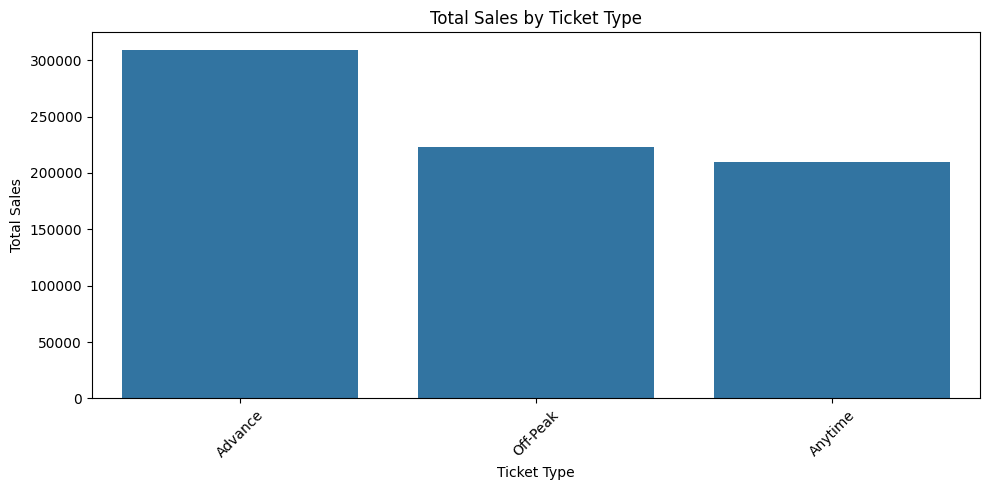

In [31]:
#Total sales by ticket type
ticket_type_sales = df.groupby('Ticket_Type')['Price'].sum().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=ticket_type_sales.index, y=ticket_type_sales.values)
plt.title("Total Sales by Ticket Type")
plt.ylabel("Total Sales")
plt.xlabel("Ticket Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As seen in the plot, Advance tickets are more common, likely due to their lower cost compared to Off-Peak tickets, which offer more flexibility.

2- How do online purchases compare to station purchases in terms of Sales?

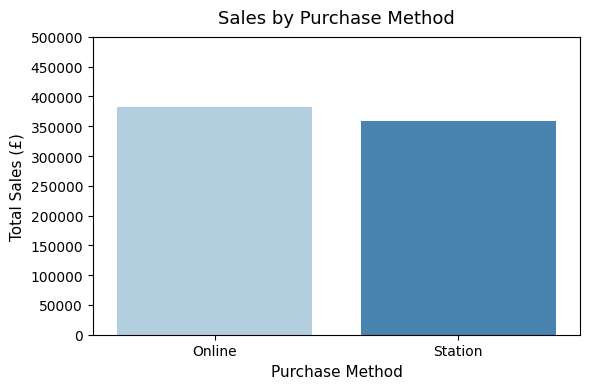

In [99]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Aggregate total sales by purchase method
purchase_type_sales = df.groupby('Purchase_Type')['Price'].sum()

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=purchase_type_sales.index, y=purchase_type_sales.values, palette='Blues')

# Set title and labels
plt.title("Sales by Purchase Method", fontsize=13, pad=10)
plt.ylabel("Total Sales (£)", fontsize=11)
plt.xlabel("Purchase Method", fontsize=11)
ax = plt.gca()
ax.yaxis.set_major_locator(mticker.MultipleLocator(50000))
ax.set_ylim(top=5_00_000)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


The data reveals a slight preference for online purchases, possibly due to convenience and accessibility, with station purchases still notable for last-minute travelers.

3- What is the impact of ticket class (Standard vs First Class) on average price and sales volume?

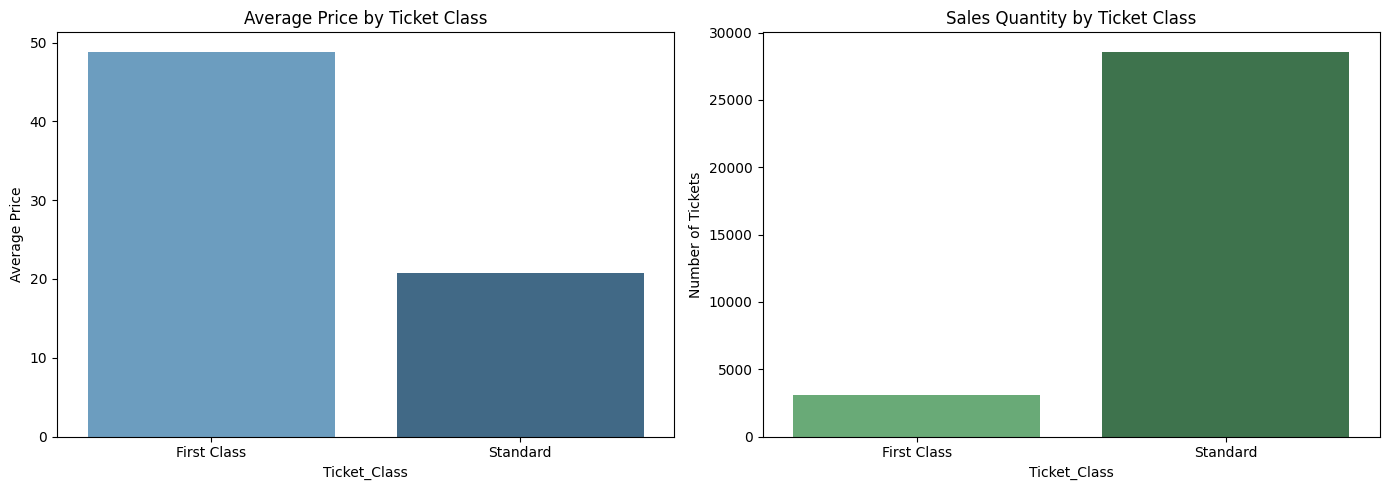

In [33]:
# Group by Ticket_Class to analyze impact on average price and total sales volume
class_summary = df.groupby('Ticket_Class')['Price'].agg(['mean', 'count']).reset_index()
class_summary.columns = ['Ticket_Class', 'Average_Price', 'Number_of_Tickets']

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Average Price per Ticket Class
sns.barplot(x='Ticket_Class', y='Average_Price', data=class_summary, ax=axs[0], palette='Blues_d')
axs[0].set_title('Average Price by Ticket Class')
axs[0].set_ylabel('Average Price')

# Number of Tickets Sold by Class
sns.barplot(x='Ticket_Class', y='Number_of_Tickets', data=class_summary, ax=axs[1], palette='Greens_d')
axs[1].set_title('Sales Quantity by Ticket Class')
axs[1].set_ylabel('Number of Tickets')

plt.tight_layout()
plt.show()




the price of the First Class ticket is relatively very hight which impact its volume of sales

4- What percentage of journeys arrive on time, delayed or canceled?

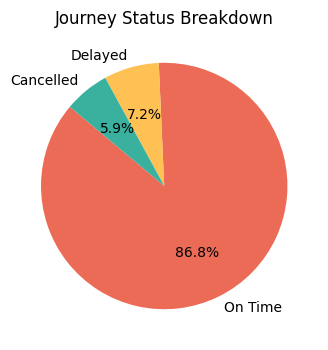

In [34]:
journey_status_counts = df['Journey_Status'].value_counts(normalize=True) * 100

# Visualize
plt.figure(figsize=(6, 4))
journey_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#EC6B56','#FFC154','#3AB09E'])
plt.title("Journey Status Breakdown")
plt.ylabel("")
plt.show()


Most journeys are on time, which is encouraging for railway reliability, though delays still occur and warrant further investigation

5- What are the most common reasons for delays?

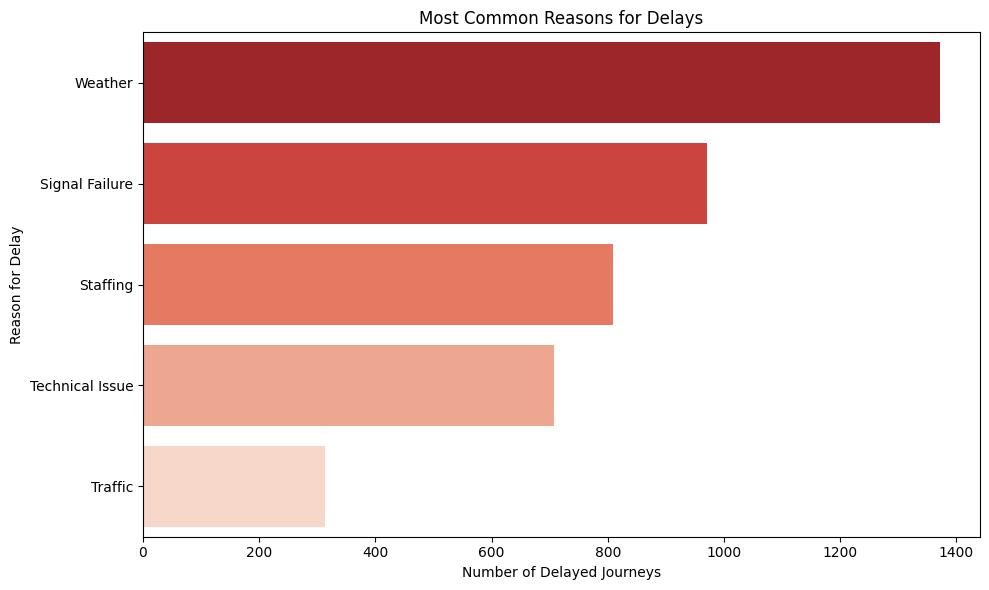

In [35]:
# Count the frequency of each delay reason, excluding 'No Delay'
delay_reasons = df[df['Reason_for_Delay'] != 'No Delay']['Reason_for_Delay'].value_counts()

# Visualizing
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette='Reds_r')
plt.title("Most Common Reasons for Delays")
plt.xlabel("Number of Delayed Journeys")
plt.ylabel("Reason for Delay")
plt.tight_layout()
plt.show()



Signal Failure appears as a common cause, suggesting areas for operational improvement to enhance service reliability.

6- What are the peak travel dates and times?

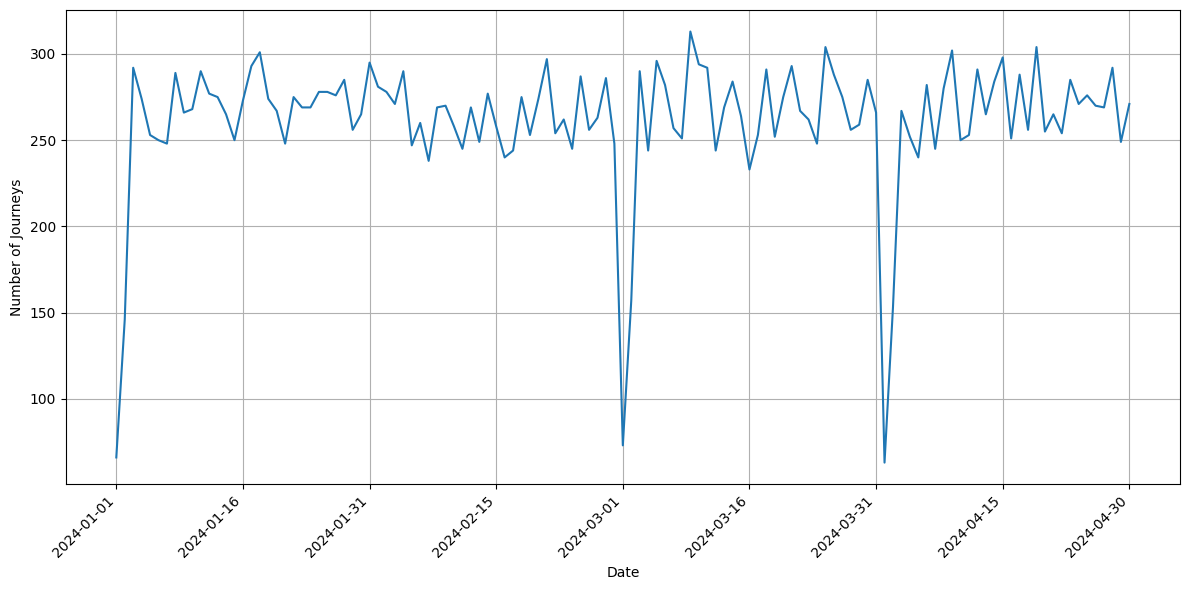

The plot highlights dates with travel volumes, such as early March and April, which has the biggest volume that may correspond to holidays or events driving increased railway usage.


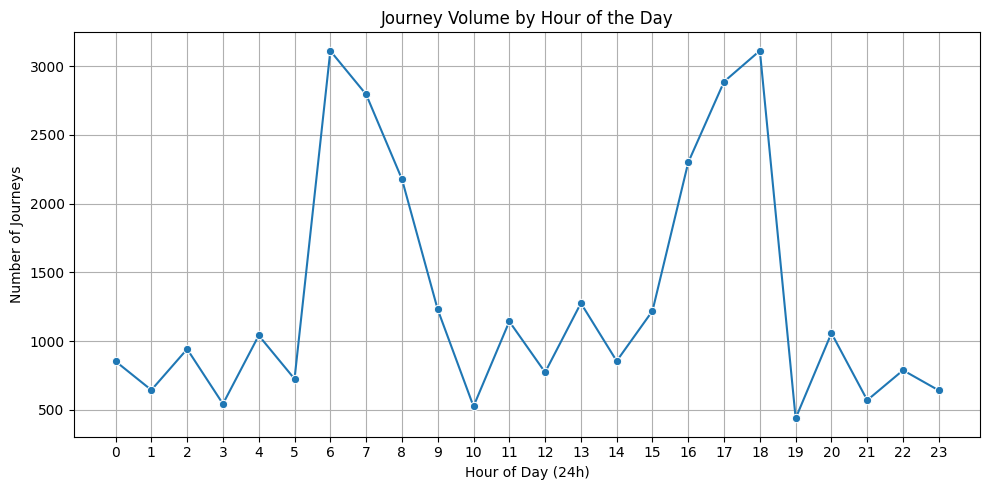

In [101]:
#convert
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])
# Extract date and hour
df['Travel_Date'] = df['Date_of_Journey'].dt.date
df['Travel_Hour'] = df['Departure_Time'].dt.hour

# Peak Travel Dates
dates = df['Travel_Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=dates.index.astype(str), y=dates.values, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.xlabel("Date")
plt.ylabel("Number of Journeys")
plt.grid(True)
plt.tight_layout()
plt.show()
print('The plot highlights dates with travel volumes, such as early March and April, which has the biggest volume that may correspond to holidays or events driving increased railway usage.')

# Peak Travel Hours
hourly_counts = df['Travel_Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.xticks(range(24))
plt.title("Journey Volume by Hour of the Day")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Journeys")
plt.grid(True)
plt.tight_layout()
plt.show()

The plot reveals two distinct peaks: one around 5–6 AM and another around 3-6 PM, likely corresponding to morning and evening commutes. Journey volume is lowest in the Late night (around 2-3 AM), which is expected as fewer people travel at that time. This insight can help railway operators optimize schedules and manage capacity during peak hours.

7- Which stations are the busiest ?

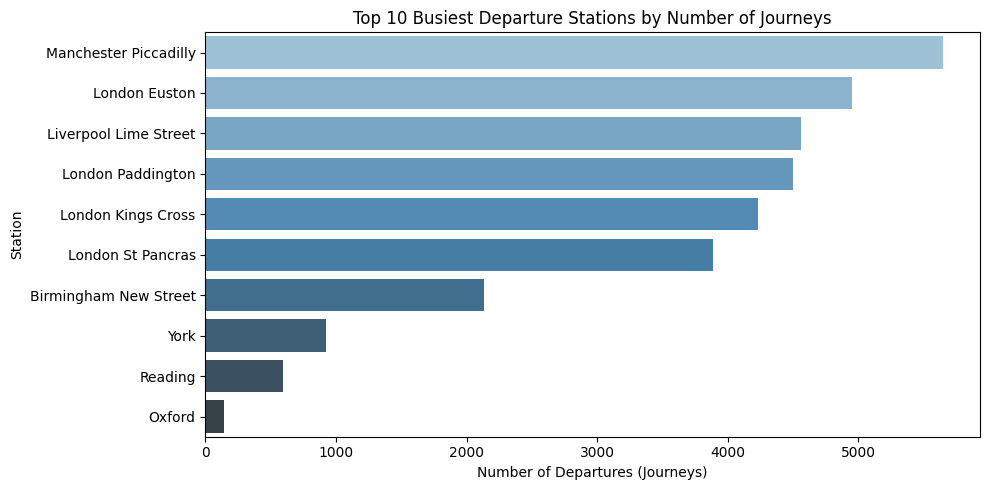

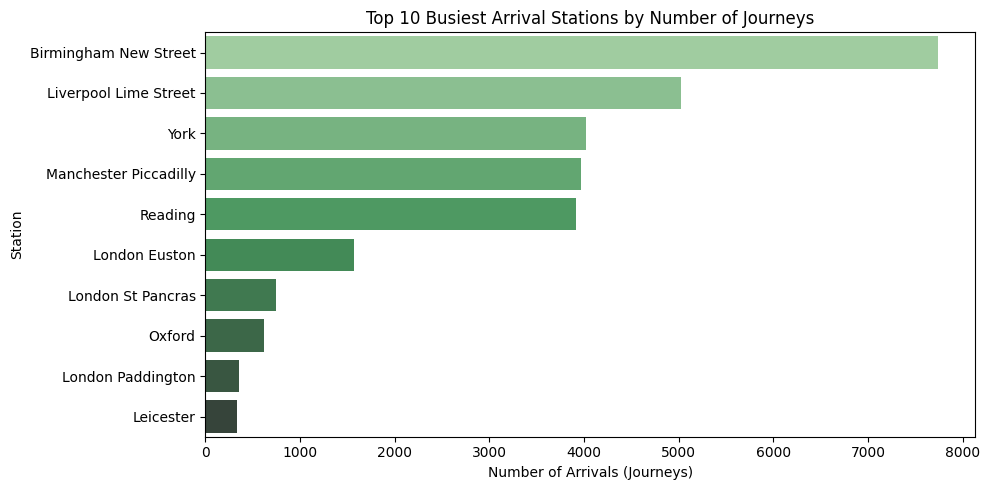

In [80]:
# Counts the number of journeys starting at each station
top_departure_stations = df_clean['Departure_Station'].value_counts().sort_values(ascending=False).head(10)

# Visualize departure stations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_departure_stations.values, y=top_departure_stations.index, palette='Blues_d')
plt.title('Top 10 Busiest Departure Stations by Number of Journeys')
plt.xlabel('Number of Departures (Journeys)')
plt.ylabel('Station')
plt.tight_layout()
plt.show()

# Counts the number of journeys ending at each station
top_arrival_stations = df_clean['Arrival_Destination'].value_counts().sort_values(ascending=False).head(10)

# Visualize arrival stations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_arrival_stations.values, y=top_arrival_stations.index, palette='Greens_d')
plt.title('Top 10 Busiest Arrival Stations by Number of Journeys')
plt.xlabel('Number of Arrivals (Journeys)')
plt.ylabel('Station')
plt.tight_layout()
plt.show()

8-What are the most used payment methods?

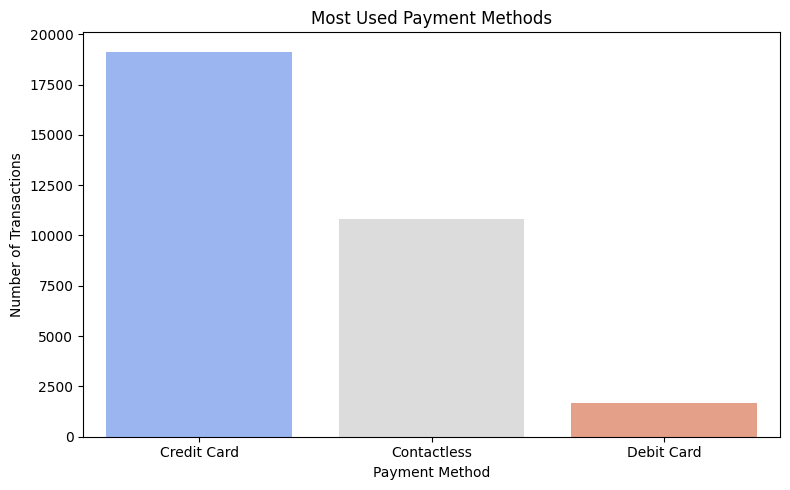

In [51]:
# Count occurrences of each payment method
payment_counts = df['Payment_Method'].value_counts()

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(y=payment_counts.values, x=payment_counts.index, palette='coolwarm')
plt.title("Most Used Payment Methods")
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Method")
plt.tight_layout()
plt.show()
#column


Credit Card payments dominate, reflecting their widespread use, while Contactless payments are also popular, indicating a shift toward modern payment solutions.

what is relationship between the number of journey and the number of delays per day ?

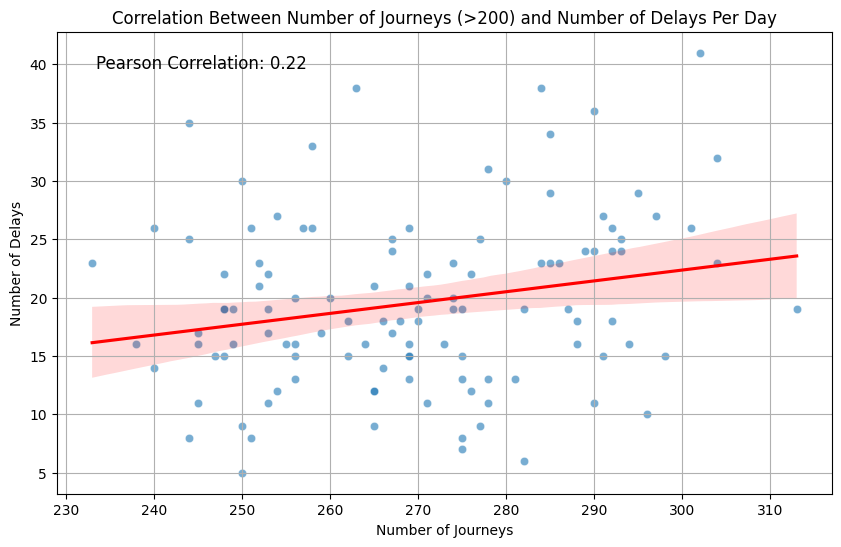

In [49]:
# Convert Date_of_Journey to datetime and extract date
df_clean['Date_of_Journey'] = pd.to_datetime(df_clean['Date_of_Journey'])
df_clean['Journey_Date'] = df_clean['Date_of_Journey'].dt.date

# Count total journeys per day, keeping only days with >200 journeys
journeys_per_day = df_clean.groupby('Journey_Date').size().reset_index(name='Number_of_Journeys').query('Number_of_Journeys > 200')

# Count delayed journeys per day
delays_per_day = df_clean[df_clean['Journey_Status'] == 'Delayed'].groupby('Journey_Date').size().reset_index(name='Number_of_Delays')

# Merge the counts
daily_stats = journeys_per_day.merge(delays_per_day, on='Journey_Date', how='left')
# Fill NaN delays with 0 (days with no delays)
daily_stats['Number_of_Delays'] = daily_stats['Number_of_Delays'].fillna(0).astype(int)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_stats, x='Number_of_Journeys', y='Number_of_Delays', alpha=0.6)

# Add regression line
sns.regplot(data=daily_stats, x='Number_of_Journeys', y='Number_of_Delays', scatter=False, color='red')

# Customize plot
plt.title('Correlation Between Number of Journeys (>200) and Number of Delays Per Day')
plt.xlabel('Number of Journeys')
plt.ylabel('Number of Delays')
plt.grid(True)

# Compute and display correlation coefficient
correlation = daily_stats['Number_of_Journeys'].corr(daily_stats['Number_of_Delays'])
plt.text(0.05, 0.95, f'Pearson Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.show()

 show that the number of delays increase by the number of journeys on the same day